# Final Project - An overview of gradient descent optimization algorithms
### Marc Rovirola
Different gradient descent
Starting with Stochaistic Gradient Descent and comparing with Adam
We'll use 

In [1]:
from matplotlib import pyplot
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt # for plotting
import matplotlib
matplotlib.rcParams['figure.dpi']=300 # highres display

# for subplots within subplots:
from matplotlib import gridspec

# for nice inset colorbars: (approach changed from lecture 1 'Visualization' notebook)
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition

# for updating display 
# (very simple animation)
from IPython.display import clear_output
from time import time, sleep

# Set up a random number generator with a fixed seed, so that
# running this whole notebook repeatedly should always give
# the same result (useful for debugging)
rng = np.random.RandomState(23455)

In [36]:
def adam(x_start, step, gradient, beta1=0.9, beta2=0.999, delta=1e-8, iteration=50):
    x = np.array(x_start, dtype='float64')
    sum_m = np.zeros_like(x)
    sum_v = np.zeros_like(x)
    passing_dot = [x.copy()]
    for i in range(iteration):
        grad = gradient(x)
        sum_m = beta1 * sum_m + (1 - beta1) * grad
        sum_v = beta2 * sum_v + (1 - beta2) * grad * grad
        x -= step * sum_m / (np.sqrt(sum_v + delta))
        passing_dot.append(x.copy())
        if abs(sum(grad)) < 1e-6:
            break;
    return x, passing_dot, i

In [3]:
def gd(x_start, step, gradient, iteration=50):
    x = np.array(x_start, dtype='float64')
    passing_dot = [x.copy()]
    for i in range(iteration):
        grad = gradient(x)
        x -= grad * step
        passing_dot.append(x.copy())
        if abs(sum(grad)) < 1e-6:
            break;
    return x, passing_dot, i

In [4]:
def momentum(x_start, step, g, discount=0.7, iteration=50):
    x = np.array(x_start, dtype='float64')
    passing_dot = [x.copy()]
    pre_grad = np.zeros_like(x)
    for i in range(iteration):
        grad = g(x)
        pre_grad = pre_grad * discount + grad
        x -= pre_grad * step
        passing_dot.append(x.copy())
        if abs(sum(grad)) < 1e-6:
            break;
    return x, passing_dot, i

In [50]:
def rmsprop(x_start, step, gradient, rms_decay=0.9, delta=1e-8, iteration=50):
    x = np.array(x_start, dtype='float64')
    sum_grad = np.zeros_like(x)
    passing_dot = [x.copy()]
    for i in range(iteration):
        grad = gradient(x)
        sum_grad = rms_decay * sum_grad + (1 - rms_decay) * grad * grad
        x -= step * grad / (np.sqrt(sum_grad) + delta)
        passing_dot.append(x.copy())        
        if abs(sum(grad)) < 1e-6:
            break;
    return x, passing_dot, i

## Convex Function
$f(x,y) = x^2$

In [101]:
def gradient(x):
    df_1 = 2*x[0]
    df_2 = 20*x[1]
    return np.array([df_1, df_2])

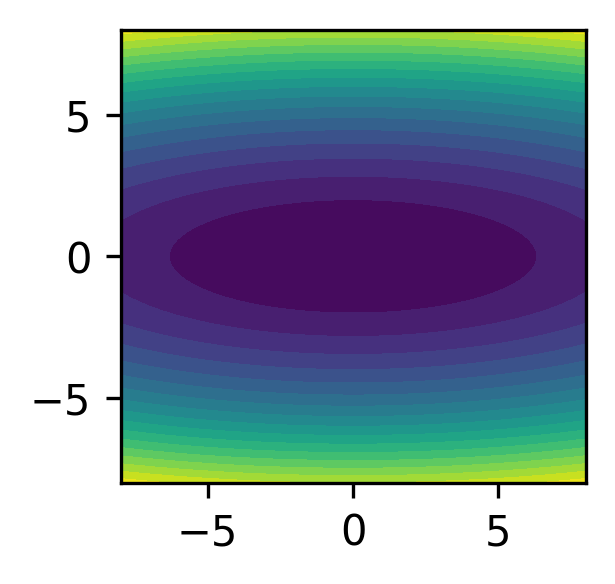

In [102]:
xi = np.linspace(-8, 8, 1000)
yi = np.linspace(-8, 8, 1000)
X,Y = np.meshgrid(xi, yi)
Z = X * X + 10*Y * Y

def contour(X,Y,Z, arr1 = None, arr2 = None):
    plt.figure(figsize=(2, 2))
    xx = X.flatten()
    yy = Y.flatten()
    zz = Z.flatten()
    plt.contourf(X, Y, Z, 20, cmap=plt.get_cmap('viridis'))
    # First GD algorithm
    if arr1 is not None:
        arr1 = np.array(arr1)
        plt.xlim(-8, 8)
        plt.ylim(-8, 8)
        plt.plot(arr1[0,0],arr1[0,1], marker="o", markersize=5, markeredgecolor="green", markerfacecolor="green")
        plt.plot(arr1[-1,0],arr1[-1,1], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
        plt.plot(arr1[:,0], arr1[:,1], linewidth=0.5, color='white')
    # Second GD algorithm
    if arr2 is not None:
        arr2 = np.array(arr2)
        plt.xlim(-8, 8)
        plt.ylim(-8, 8)
        plt.plot(arr2[0,0],arr2[0,1], marker="o", markersize=5, markeredgecolor="purple", markerfacecolor="green")
        plt.plot(arr2[:,0], arr2[:,1], linewidth=0.5, color='black')
        plt.plot(arr2[-1,0],arr2[-1,1], marker="o", markersize=5, markeredgecolor="dodgerblue", markerfacecolor="dodgerblue")

contour(X,Y,Z)

## SADDLE POINT

$f(x,y) = x^2 - y^2$

In [103]:
x_start = [7,5]
step = 0.008

In [104]:
x_a, passing_a, step_a = adam(x_start, step, gradient, iteration = 500)
x_s, passing_s, step_s = gd(x_start, step, gradient, iteration = 500)
x_m, passing_m, step_m = momentum(x_start, step, gradient, iteration = 500)
x_r, passing_r, step_r = rmsprop(x_start, step, gradient, iteration = 500)

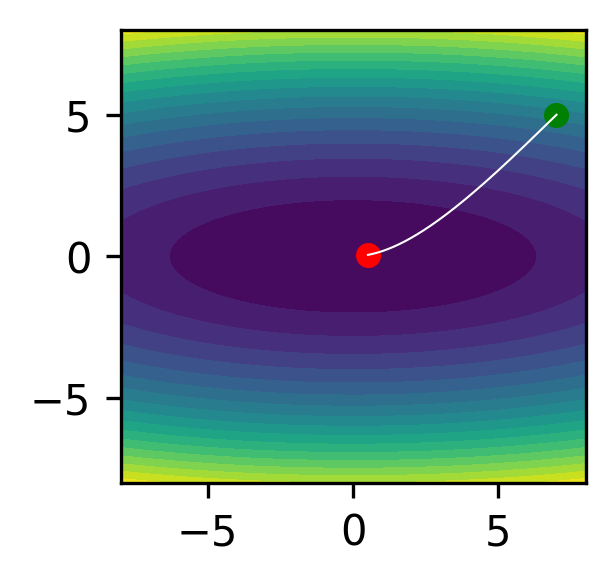

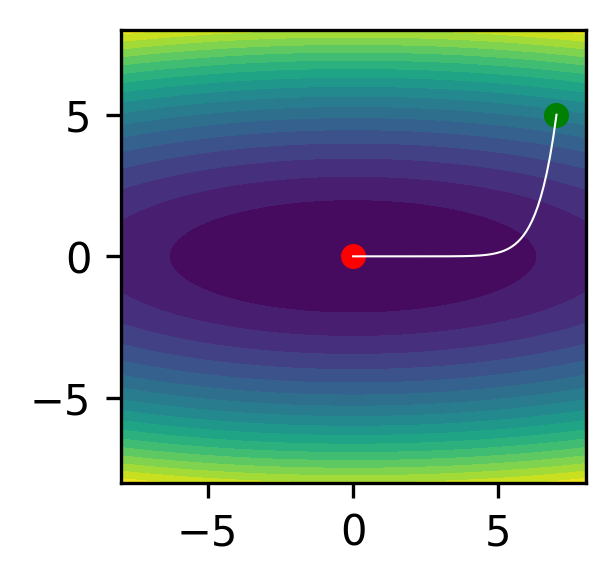

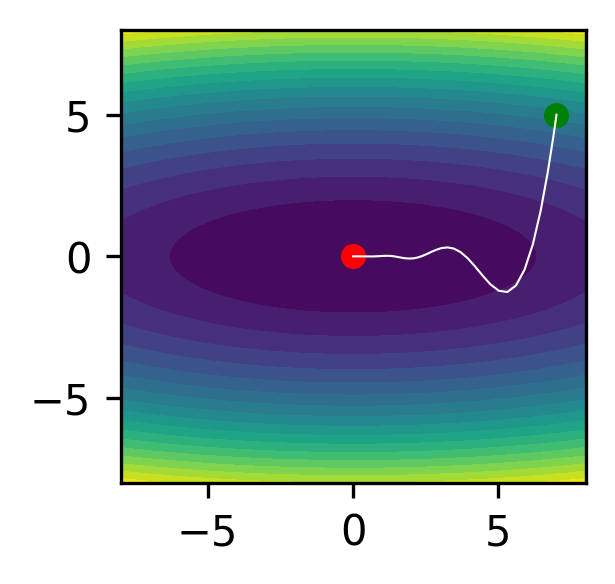

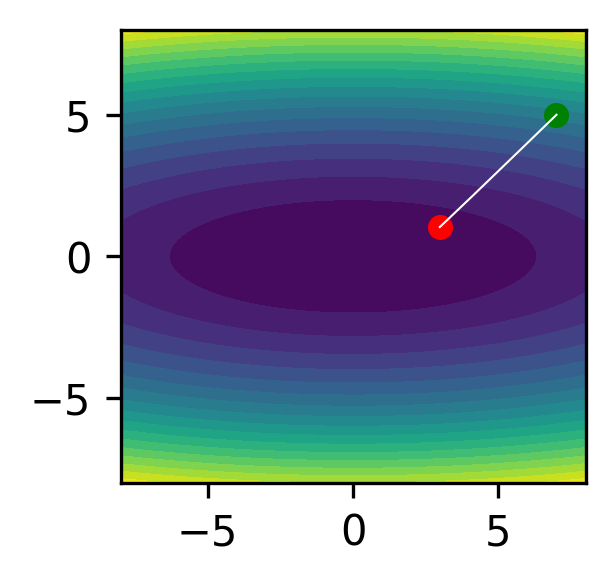

In [105]:
contour(X,Y,Z, passing_a)
contour(X,Y,Z, passing_s)
contour(X,Y,Z, passing_m)
contour(X,Y,Z, passing_r)

In [106]:
def gradient(x):
    df_1 = 2*x[0]
    df_2 = -2*x[1]
    return np.array([df_1, df_2])

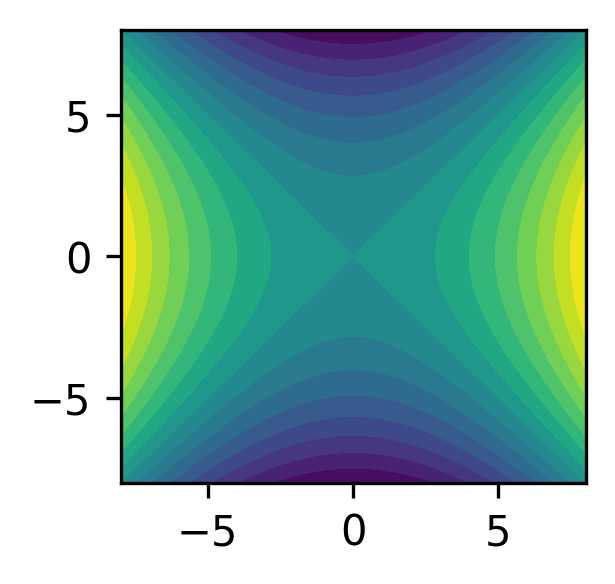

In [107]:
xi = np.linspace(-8, 8, 1000)
yi = np.linspace(-8, 8, 1000)
X,Y = np.meshgrid(xi, yi)
Z = X * X - Y * Y

def contour(X,Y,Z, arr1 = None, arr2 = None):
    plt.figure(figsize=(2, 2))
    xx = X.flatten()
    yy = Y.flatten()
    zz = Z.flatten()
    plt.contourf(X, Y, Z, 20, cmap=plt.get_cmap('viridis'))
    # First GD algorithm
    if arr1 is not None:
        arr1 = np.array(arr1)
        plt.xlim(-8, 8)
        plt.ylim(-8, 8)
        plt.plot(arr1[0,0],arr1[0,1], marker="o", markersize=5, markeredgecolor="green", markerfacecolor="green")
        plt.plot(arr1[-1,0],arr1[-1,1], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
        plt.plot(arr1[:,0], arr1[:,1], linewidth=0.5, color='white')
    # Second GD algorithm
    if arr2 is not None:
        arr2 = np.array(arr2)
        plt.xlim(-8, 8)
        plt.ylim(-8, 8)
        plt.plot(arr2[0,0],arr2[0,1], marker="o", markersize=5, markeredgecolor="purple", markerfacecolor="green")
        plt.plot(arr2[:,0], arr2[:,1], linewidth=0.5, color='black')
        plt.plot(arr2[-1,0],arr2[-1,1], marker="o", markersize=5, markeredgecolor="dodgerblue", markerfacecolor="dodgerblue")

contour(X,Y,Z)

In [108]:
x_start = [7,0.01]
step = 0.008

In [109]:
x_a, passing_a, step_a = adam(x_start, step, gradient, iteration = 500)
x_s, passing_s, step_s = gd(x_start, step, gradient, iteration = 500)
x_m, passing_m, step_m = momentum(x_start, step, gradient, iteration = 500)
x_r, passing_r, step_r = rmsprop(x_start, step, gradient, iteration = 500)

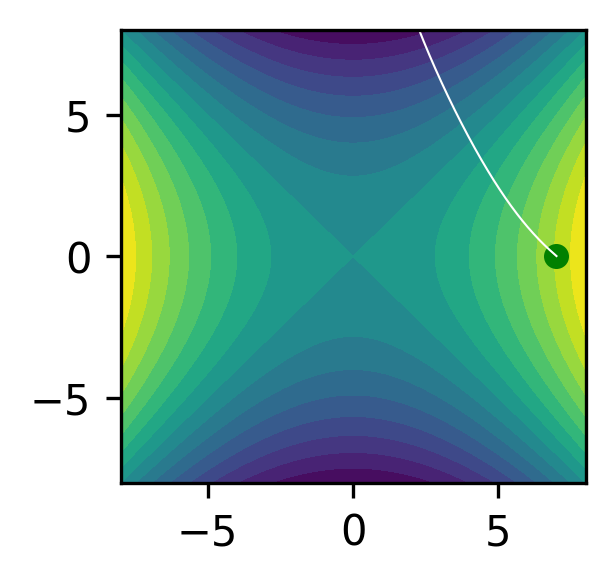

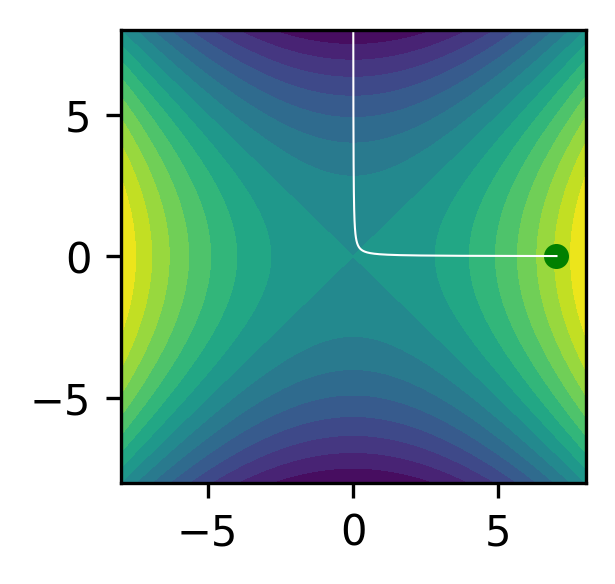

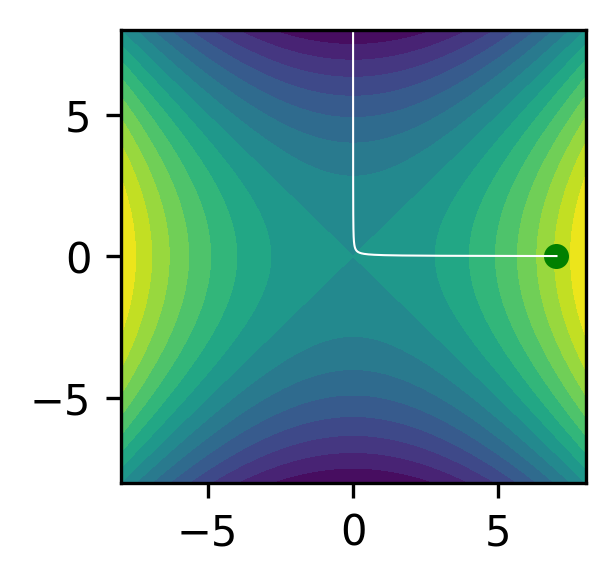

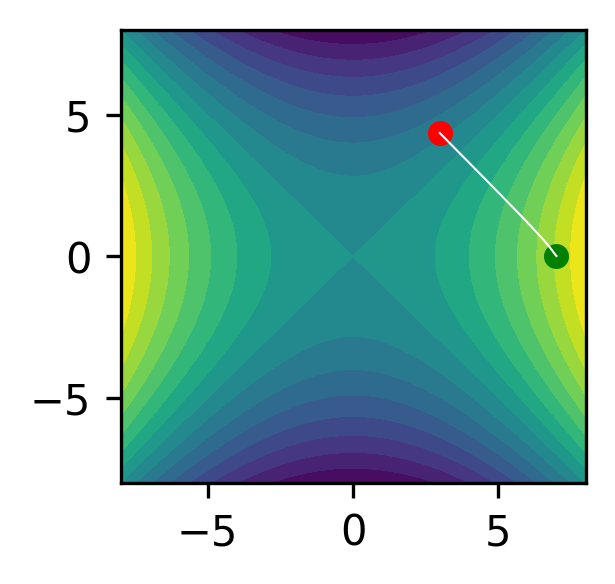

In [110]:
contour(X,Y,Z, passing_a)
contour(X,Y,Z, passing_s)
contour(X,Y,Z, passing_m)
contour(X,Y,Z, passing_r)